# Intro

Apply normalization to re-shaped images

# Setup 

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib
import skimage
from skimage import transform
import glob2

%matplotlib inline

# Images path

In [2]:
ad_data_dir='C:/Users/s.ciappelloni/Documents/projet_final/chef-doeuvre-Beatrix84/data/sample/AD'
cn_data_dir='C:/Users/s.ciappelloni/Documents/projet_final/chef-doeuvre-Beatrix84/data/sample/CN'
mci_data_dir='C:/Users/s.ciappelloni/Documents/projet_final/chef-doeuvre-Beatrix84/data/sample/MCI'

# Visualize images before processing

(256, 170)
256


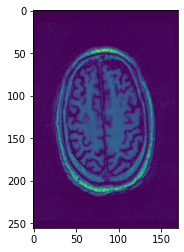

In [3]:
# Path to the images
master_dir = os.path.join('../data/sample/')
adni_data = glob2.glob(master_dir + '/**/*.nii')

# Nibabel library to load open and visualize images
im = nib.load(adni_data[10]).get_fdata()
plt.imshow(im[85])
print(im[10].shape)
print(len(im))

# Create new folders for processed images

In [4]:
if not os.path.exists('C:/Users/s.ciappelloni/Documents/projet_final/chef-doeuvre-Beatrix84/data/sample/processed3/AD'):
    os.makedirs('C:/Users/s.ciappelloni/Documents/projet_final/chef-doeuvre-Beatrix84/data/sample/processed3/AD')
    
if not os.path.exists('C:/Users/s.ciappelloni/Documents/projet_final/chef-doeuvre-Beatrix84/data/sample/processed3/CN'):
    os.makedirs('C:/Users/s.ciappelloni/Documents/projet_final/chef-doeuvre-Beatrix84/data/sample/processed3/CN')
    
if not os.path.exists('C:/Users/s.ciappelloni/Documents/projet_final/chef-doeuvre-Beatrix84/data/sample/processed3/MCI'):
    os.makedirs('C:/Users/s.ciappelloni/Documents/projet_final/chef-doeuvre-Beatrix84/data/sample/processed3/MCI')

In [5]:
ad_write_dir = 'C:/Users/s.ciappelloni/Documents/projet_final/chef-doeuvre-Beatrix84/data/sample/processed3/AD'
cn_write_dir = 'C:/Users/s.ciappelloni/Documents/projet_final/chef-doeuvre-Beatrix84/data/sample/processed3/CN'
mci_write_dir = 'C:/Users/s.ciappelloni/Documents/projet_final/chef-doeuvre-Beatrix84/data/sample/processed3/MCI'

# First method Processing

In [6]:
nummean = 138
nummax = 5185
converted_shape = (21,42,42)

In [7]:
#For AD data
for file in os.listdir(ad_data_dir):
    # call load_data 
    img = nib.load(os.path.join(ad_data_dir,file))
    img = img.get_fdata()
    # resize
    img = skimage.transform.resize(img, converted_shape)
    #normalize
    img = (img - nummean) / nummax
    #rename with id
    id =  file.split('_')[-1].split('.')[0]
    np_filename = id + '.npy'
    #save to a new folder
    np.save(os.path.join(ad_write_dir, np_filename),img)

In [8]:
#For CN data    
for file in os.listdir(cn_data_dir):
    img = nib.load(os.path.join(cn_data_dir, file))
    img = img.get_fdata()
    #resize
    img = skimage.transform.resize(img, converted_shape)
    #normalize
    img = (img - nummean) / nummax
    #rename with id
    id =  file.split('_')[-1].split('.')[0]
    np_filename = id + '.npy'
    #save
    np.save(os.path.join(cn_write_dir,np_filename),img)    

In [9]:
#For MCI data    
for file in os.listdir(mci_data_dir):
    img = nib.load(os.path.join(mci_data_dir, file))
    img = img.get_fdata()
    #resize
    img = skimage.transform.resize(img, converted_shape)
    #normalize
    img = (img - nummean) / nummax
    #rename with id
    id =  file.split('_')[-1].split('.')[0]
    np_filename = id + '.npy'
    #save
    np.save(os.path.join(mci_write_dir,np_filename),img)      

## Visualize after pre-processing

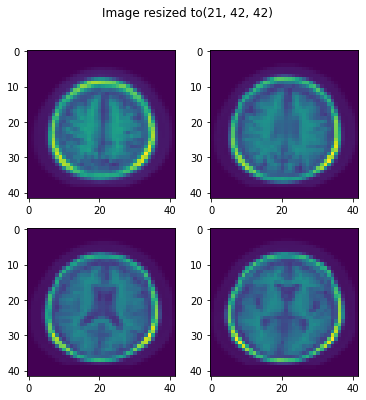

In [11]:
img = np.load('C:/Users/s.ciappelloni/Documents/projet_final/chef-doeuvre-Beatrix84/data/sample/processed3/AD/I34195.npy')   

fig, axs1 = plt.subplots(2, 2,figsize= (6,6))

fig.suptitle('Image resized to'+str(img.shape))
i = 7
axs1[0, 0].imshow(img[i])

axs1[0, 1].imshow(img[i+1])

axs1[1, 0].imshow(img[i+2])

axs1[1, 1].imshow(img[i+3])


In [12]:
img

array([[[-0.02661524, -0.02661524, -0.02661524, ..., -0.02661524,
         -0.02661524, -0.02661524],
        [-0.02661524, -0.02661524, -0.02661524, ..., -0.02661524,
         -0.02661524, -0.02661524],
        [-0.02661524, -0.02661524, -0.02661524, ..., -0.02661524,
         -0.02661524, -0.02661524],
        ...,
        [-0.02661524, -0.02661524, -0.02661524, ..., -0.02661524,
         -0.02661524, -0.02661524],
        [-0.02661524, -0.02661524, -0.02661524, ..., -0.02661524,
         -0.02661524, -0.02661524],
        [-0.02661524, -0.02661524, -0.02661524, ..., -0.02661524,
         -0.02661524, -0.02661524]],

       [[-0.02661524, -0.02661524, -0.02661524, ..., -0.02661524,
         -0.02661524, -0.02661524],
        [-0.02661524, -0.02661524, -0.02661524, ..., -0.02661524,
         -0.02661524, -0.02661524],
        [-0.02661524, -0.02661524, -0.02661524, ..., -0.02661524,
         -0.02661524, -0.02661524],
        ...,
        [-0.02661524, -0.02661524, -0.02661524, ..., -

Try this other formula too (X − minX / maxX − minX) − 0.5